# UFC Betting

## Data Loading and Merging

In [1]:
from pathlib import Path

import pandas as pd

data_path = Path().cwd().parent / 'data' / 'external' / 'ufc-master.csv'

df = pd.read_csv(data_path)

In [3]:
pattern_dif = r'_dif$'
df_dif = df.filter(regex=pattern_dif)

pattern_b = r'^B_'
df_b = df.filter(regex=pattern_b)

pattern_r = r'^R_'
df_r = df.filter(regex=pattern_r)

In [4]:
other_cols = df_dif.columns.append(df_b.columns).append(df_r.columns)

df_info = df.drop(other_cols, axis=1)

df2 = pd.concat([df_info, df_dif], axis=1)

df3 = pd.concat([
    df2,
    df_b[['B_fighter', 'B_odds']],
    df_r[['R_fighter', 'R_odds']]
],
    axis=1)

df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    4588 non-null   object 
 1   location                4588 non-null   object 
 2   country                 4588 non-null   object 
 3   Winner                  4588 non-null   object 
 4   title_bout              4588 non-null   bool   
 5   weight_class            4588 non-null   object 
 6   gender                  4588 non-null   object 
 7   no_of_rounds            4588 non-null   int64  
 8   empty_arena             4588 non-null   int64  
 9   constant_1              4588 non-null   int64  
 10  better_rank             4588 non-null   object 
 11  finish                  4118 non-null   object 
 12  finish_details          2014 non-null   object 
 13  finish_round            4099 non-null   float64
 14  finish_round_time       4099 non-null   

In [5]:
ufc = df3.drop(['finish_details', 'constant_1'], axis=1)

ufc.dropna(inplace=True)

----

## EDA
### **Question:** Who will win the fight?

In [8]:
pd.set_option('display.max_columns', None) # set to view all columns
 
ufc.head()

,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,empty_arena,better_rank,finish,finish_round,finish_round_time,total_fight_time_secs,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_fighter,B_odds,R_fighter,R_odds
233,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Light Heavyweight,MALE,3,1,Red,U-DEC,3.0,5:00,900.0,0,0,1,-6,-6,-31,-1,-4,-3,0.00,5.08,-4,1.98,-0.4,0.75,Aleksandar Rakic,-278.0,Anthony Smith,225.0
234,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,1,Red,U-DEC,3.0,5:00,900.0,-3,2,2,-3,-7,-30,-6,-7,1,10.16,15.24,-5,0.38,0.3,1.84,Neil Magny,-250.0,Robbie Lawler,200.0
235,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Flyweight,FEMALE,3,1,Blue,U-DEC,3.0,5:00,900.0,1,-1,-1,0,1,2,0,-1,0,-5.08,-15.24,-3,0.76,0.6,0.19,Alexa Grasso,-315.0,Ji Yeon Kim,230.0
236,8/29/2020,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,1,neither,U-DEC,3.0,5:00,900.0,-1,0,-4,-14,-8,-48,-1,-5,-3,10.16,5.08,-7,6.92,-1.0,-1.63,Bill Algeo,240.0,Ricardo Lamas,-335.0
237,8/29/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,neither,U-DEC,3.0,5:00,900.0,-1,0,-1,-1,-2,-6,0,-1,0,2.54,0.00,-3,0.58,-0.6,0.23,Impa Kasanganay,-139.0,Maki Pitolo,115.0


List of fixes:

1. Normalize weight class -> take out gender from weight class since we already have gender column
2. Normalize fight times

In [7]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4099 entries, 233 to 4587
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    4099 non-null   object 
 1   location                4099 non-null   object 
 2   country                 4099 non-null   object 
 3   Winner                  4099 non-null   object 
 4   title_bout              4099 non-null   bool   
 5   weight_class            4099 non-null   object 
 6   gender                  4099 non-null   object 
 7   no_of_rounds            4099 non-null   int64  
 8   empty_arena             4099 non-null   int64  
 9   better_rank             4099 non-null   object 
 10  finish                  4099 non-null   object 
 11  finish_round            4099 non-null   float64
 12  finish_round_time       4099 non-null   object 
 13  total_fight_time_secs   4099 non-null   float64
 14  lose_streak_dif         4099 non-null 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

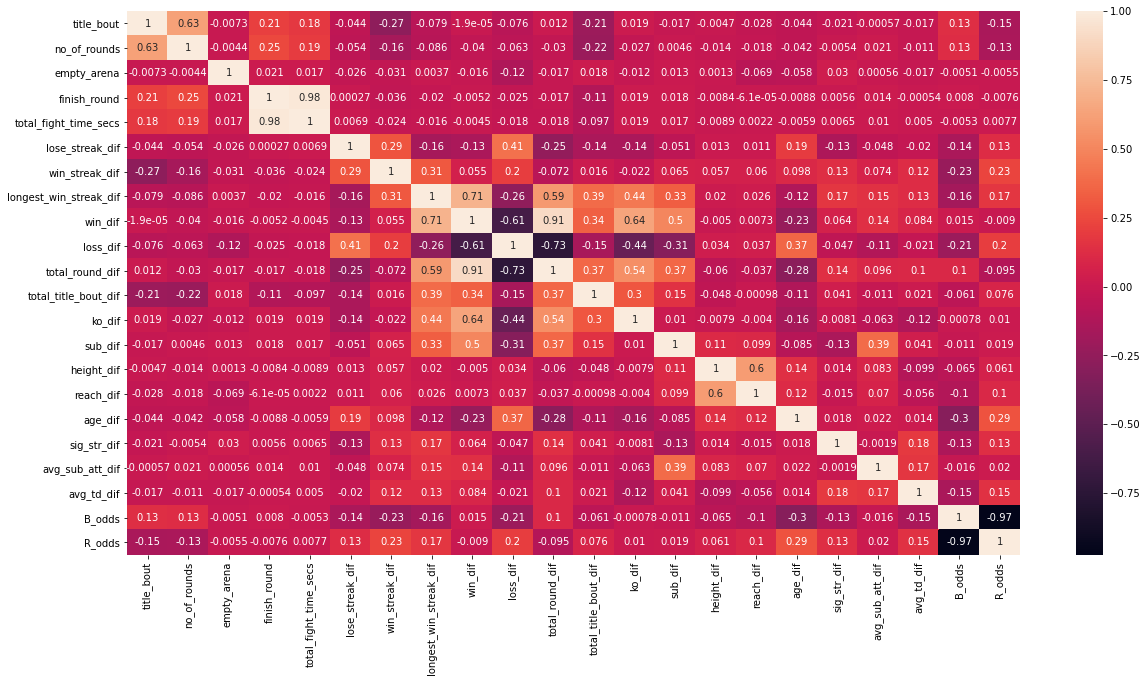

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(ufc.corr(), annot=True)

Notes on correlation heatmap:

* There may be a problem with some of these **so we'll run a VIF analysis once data is cleaned all the way**
* These correlations make sense such as experience leading to better performance

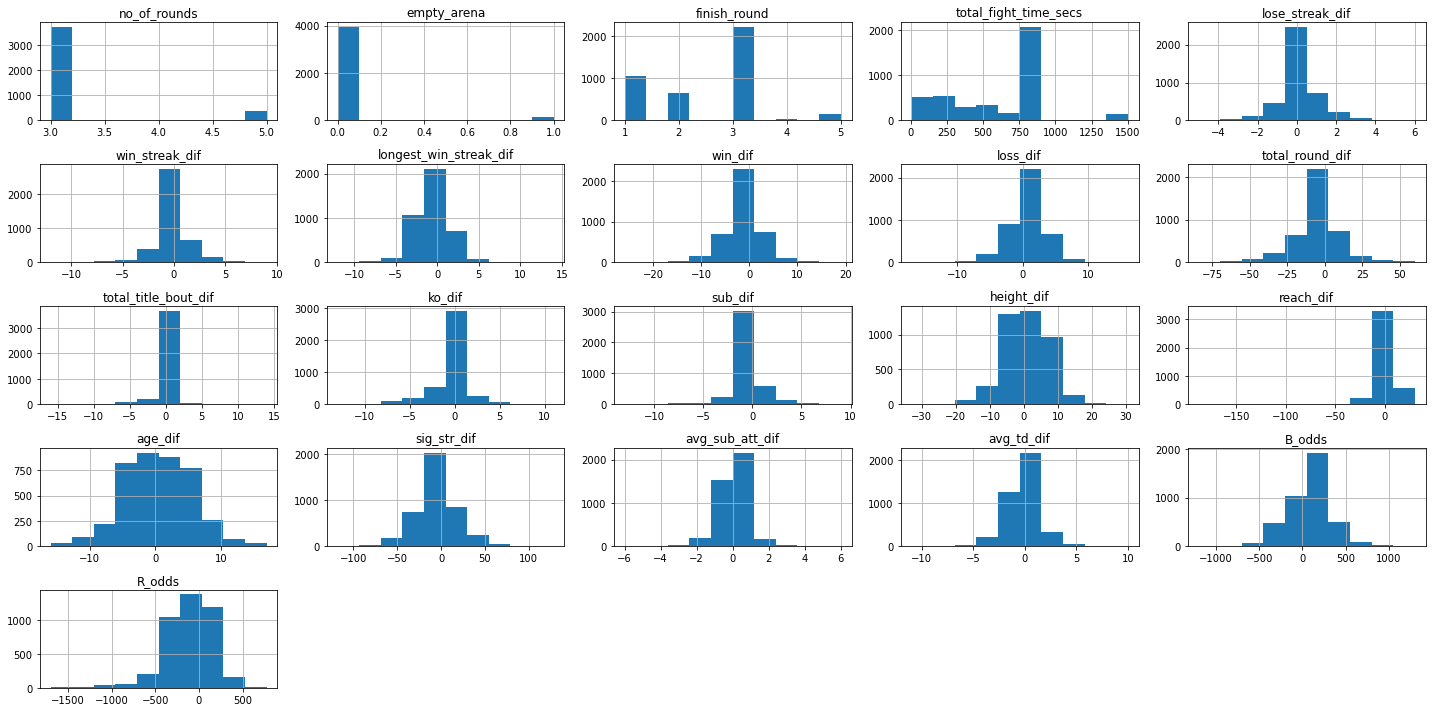

In [15]:
ufc.hist(figsize=(20,10))
plt.tight_layout()

Distribution notes:

* The differentials look nice and normal
* May need to bucket some of these, such as:
    * Empty arena
    * Number of rounds
        * Could probably remove and just keep fight time in sec since that'll include the round information
* Outliers to explore:
    * Odds for both corners
    * Reach differential

-----
## Code Annex

In [22]:
# VIF CODE TO USE AFTER CLEANING

from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = ufc.select_dtypes('number')
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature         VIF
0             no_of_rounds   14.449622
1              empty_arena    1.118601
2             finish_round  156.124243
3    total_fight_time_secs   97.792161
4          lose_streak_dif    1.552944
5           win_streak_dif    1.458881
6   longest_win_streak_dif    3.580665
7                  win_dif   23.125253
8                 loss_dif    3.679484
9          total_round_dif   16.331923
10    total_title_bout_dif    1.512818
11                  ko_dif    3.383197
12                 sub_dif    2.706366
13              height_dif    1.631751
14               reach_dif    1.599766
15                 age_dif    1.284718
16             sig_str_dif    1.261121
17         avg_sub_att_dif    1.252162
18              avg_td_dif    1.203098
19                  B_odds   20.407285
20                  R_odds   22.668314
